## Customer Demographics Analysis and Predicting Modeling of Purchase amounts

##### Case study and DataHack competition hosted by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/black-friday/)

###### Autor: [Datageekette](http://datageekette.com/)


#### Problem Statement

A retail company wants to understand the customer purchase behaviour and build a model to predict the purchase amount of customer against various product categories which will help them to create more customer-focused offers.

#### Data description

Dataset contains purchase summary of customers for high volume products (for a certain period). It also contains customer demographics like age, gender, marital status, type of a city, quantity of years stayed in the city, product details and a total purchase amount.

| VarName | Description |
| --- | --- |
| User_ID| User ID |
| Product_ID | Product ID |
| Gender | Sex of User |
| Age | Age in bins |
| Occupation | Occupation (Masked) |
| City_Category | Category of the City (A, B, C) |
| Stay_In_Current_City_Years | Number of years stay in current city |
| Marital_Status | Marital Status (1 - married, 0 - single) |
| Product_Category_1 | Product Category (Masked) |
| Product_Category_2 | Product may belongs to other category also (Masked) |
| Product_Category_3 | Product may belongs to other category also (Masked) |
| Purchase | Purchase Amount (Target Variable) |           


#### Comments of the author

It's a shame that a few variables are masked from the dataset, like customer Occupation and Product Categories. Despite that, we can still have an interesting analysis of customer demographics and surely answer to the main task: predicting customer purchase amount againt products categories.

This Notebook was created with intention to:
  - create a business case type portfolio project
  - help aspired data analysts to manage their data analysis projects' workflow
  - have a dipper understanding of algorythms for regression tasks
  
###### Ready or not let's begin.

### I. Data Analysis of Customer demographics

Loading packages and data. Notice that I have an initially splitted data: train and test sets.

In [1]:
# data wrangling
require(plyr)
require(dplyr)
require(tidyr)

# data visualization
require(ggplot2)
require(RColorBrewer)

# dummy coding, processing and modeling
require(caret)

# loading data
train <- read.csv("~/Documents/projects/blackfriday/train.csv",
                  colClasses = c("integer", rep("character", 2), rep("factor", 4), rep("integer", 4)))
test <- read.csv("~/Documents/projects/blackfriday/test.csv",
                  colClasses = c("integer", rep("character", 2), rep("factor", 4), rep("integer", 3)))

Loading required package: plyr
Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr
Loading required package: ggplot2
Loading required package: RColorBrewer
Loading required package: caret
Loading required package: lattice



Let's take a quick look:

In [3]:
# glancing at data (without purchase amount)
train[,1:11] %>% 
    rbind(test) %>%
    glimpse()

Observations: 783,667
Variables: 11
$ User_ID                    <int> 1000001, 1000001, 1000001, 1000001, 1000...
$ Product_ID                 <chr> "P00069042", "P00248942", "P00087842", "...
$ Gender                     <chr> "F", "F", "F", "F", "M", "M", "M", "M", ...
$ Age                        <fctr> 0-17, 0-17, 0-17, 0-17, 55+, 26-35, 46-...
$ Occupation                 <fctr> 10, 10, 10, 10, 16, 15, 7, 7, 7, 20, 20...
$ City_Category              <fctr> A, A, A, A, C, A, B, B, B, A, A, A, A, ...
$ Stay_In_Current_City_Years <fctr> 2, 2, 2, 2, 4+, 3, 2, 2, 2, 1, 1, 1, 1,...
$ Marital_Status             <int> 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1...
$ Product_Category_1         <int> 3, 1, 12, 12, 8, 1, 1, 1, 1, 8, 5, 8, 8,...
$ Product_Category_2         <int> NA, 6, NA, 14, NA, 2, 8, 15, 16, NA, 11,...
$ Product_Category_3         <int> NA, 14, NA, NA, NA, NA, 17, NA, NA, NA, ...


In [13]:
# no. of NA's in additional product categories
cat("
Number of NA's for the second additional category is equal to", sum(is.na(train$Product_Category_2)))
cat("
And number of NA's for the third additional category is equal to", sum(is.na(train$Product_Category_3)))


Number of NA's for the second additional category is equal to 173638
And number of NA's for the third additional category is equal to 383247

Overall dataset contains around 790k observations. Note that I intentionally transformed categorical variables such as age bins and gender into factors while leaving as character strings others for further transformation.

We have quite a bit of missing values in additional categories. However the presence of NA's is logical because not every product relate to several categories at the same time.

Let's now start data exploring. The best way to do this is to create informative yet simple visualizations.

In [14]:
# unite two splitted sets together for a bigger picture
full <- rbind(train[, 1:11], test)
# assign levels to Marital Status
levels(full$Marital_Status) <- c("single", "married")

Facet grid is one of the best types of visual data presentation outhere as it gives a concise view of a variable distribution against others.

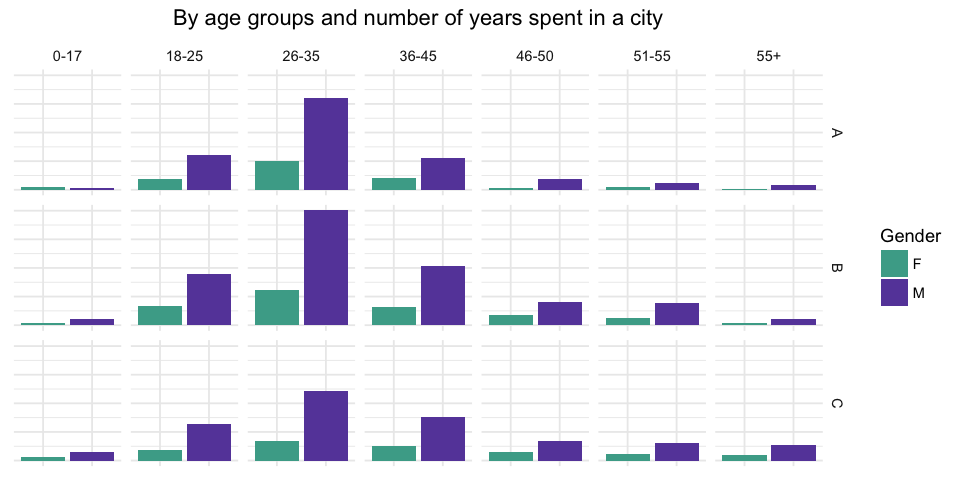

In [15]:
# plot size 
options(repr.plot.width = 8, repr.plot.height = 4)

# setting themes
custom_theme <- theme(plot.title = element_text(hjust = 0.5),
                      legend.position = "right")

no_ticks_axis <- theme(axis.text = element_blank(),
                       axis.ticks = element_blank())

gender_palette <- c("#49A997", "#6749A9")

age_city <- ggplot(full, aes(x = Gender))
age_city + geom_bar(aes(fill = Gender), position = "dodge") +
    labs(title = "By age groups and number of years spent in a city", 
         x = NULL, y = NULL) +
    facet_grid(City_Category ~ Age) + 
    theme_minimal() + custom_theme +
    no_ticks_axis + 
    scale_fill_manual(values = gender_palette)

From the plots above we can now draw a portrait of the most popular customer: it's a man aged between 26-35 years old from B city category. We can also see that customers above 45 have less interest in products than younger generation, which leads to a though that there's might be some (human) physical limits involved.

If the retailor's business sector is sport, then sports equipment would be at the peak of sales in the same age group shown above (from 26 to 35 years); under decreasing trend among customers under 25 (possibly because these goods are often too expensive) and elderly.

City category B seems to gain more orders than the rest. However there is a good dynamic in city category C: demographics are not the dispersed comparing to other groups which indicates healthier relations with a product.

In [6]:
# single/married customers
full %>%
    group_by(Marital_Status) %>%
    summarize(n_cust = n()) %>%
    mutate(prop = round(n_cust / sum(n_cust) * 100, 2))

# top 5 occupations
full %>%
    group_by(Occupation) %>%
    summarize(n_cust = n()) %>%
    mutate(prop = round(n_cust / sum(n_cust) * 100, 2)) %>%
    arrange(desc(prop)) %>%
    head(5) 

Marital_Status,n_cust,prop
single,462538,59.02
married,321129,40.98


Occupation,n_cust,prop
4,103086,13.15
0,98850,12.61
7,84127,10.74
1,67687,8.64
17,57418,7.33


As we can see single customers are in majority and that top 5 occupations represent a good half the whole number of purchases made at that period. Which is close to Pareto-rule where 20% of customers make 80% of orders.

#### Conclusion of the Customer demographics analysis:

 - Customer portrait: a man between 26-35 from B city category.
 - Female customers follow the same trend as male: peak of sales between age 25-26. 
 - Customers with ocuppation types 4, 0, 7, 1 and 17 represent the majority of retailer's clients (more than a half of a total number of customers).
 - There is a potential for growth in C city category. Market research and revising marketing/advertising campaigns could spread the light on missing opportunities.

### II. Preparation: data transformation & adding new variables.


Taking a quick look again:

In [6]:
glimpse(train)

Observations: 550,068
Variables: 12
$ User_ID                    <int> 1000001, 1000001, 1000001, 1000001, 1000...
$ Product_ID                 <chr> "P00069042", "P00248942", "P00087842", "...
$ Gender                     <chr> "F", "F", "F", "F", "M", "M", "M", "M", ...
$ Age                        <fctr> 0-17, 0-17, 0-17, 0-17, 55+, 26-35, 46-...
$ Occupation                 <fctr> 10, 10, 10, 10, 16, 15, 7, 7, 7, 20, 20...
$ City_Category              <fctr> A, A, A, A, C, A, B, B, B, A, A, A, A, ...
$ Stay_In_Current_City_Years <fctr> 2, 2, 2, 2, 4+, 3, 2, 2, 2, 1, 1, 1, 1,...
$ Marital_Status             <int> 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1...
$ Product_Category_1         <int> 3, 1, 12, 12, 8, 1, 1, 1, 1, 8, 5, 8, 8,...
$ Product_Category_2         <int> NA, 6, NA, 14, NA, 2, 8, 15, 16, NA, 11,...
$ Product_Category_3         <int> NA, 14, NA, NA, NA, NA, 17, NA, NA, NA, ...
$ Purchase                   <int> 8370, 15200, 1422, 1057, 7969, 15227, 19...


Let's see if we can save some space and time for fitting models while not loosing any valuable information. Could we represent additional product categories by creating two new variables that only the presence of these last ones and not the product categories themselves.

We also need to transform few categorical variables like Gender and City Category into continious ones.

In [2]:
new_train <- train %>% 
    mutate(Main_Category = factor(Product_Category_1),
           Second = as.integer(ifelse(is.na(Product_Category_2), 0, 1)),
           Third = as.integer(ifelse(is.na(Product_Category_3), 0, 1)),
           # 1 - Female, 0 - Male
                Gender = as.integer(ifelse(Gender == "F", 1, 0)),
                Stay_Years = as.integer(ifelse(Stay_In_Current_City_Years == "1", 2, 
                    ifelse(Stay_In_Current_City_Years == 2, 2, 
                    ifelse(Stay_In_Current_City_Years == 3, 3, 4))))) %>%
         dplyr::select(-User_ID, -Product_ID, -Product_Category_1, -Stay_In_Current_City_Years)

glimpse(new_train)

Observations: 550,068
Variables: 12
$ Gender             <int> 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...
$ Age                <fctr> 0-17, 0-17, 0-17, 0-17, 55+, 26-35, 46-50, 46-5...
$ Occupation         <fctr> 10, 10, 10, 10, 16, 15, 7, 7, 7, 20, 20, 20, 20...
$ City_Category      <fctr> A, A, A, A, C, A, B, B, B, A, A, A, A, A, A, A,...
$ Marital_Status     <int> 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...
$ Product_Category_2 <int> NA, 6, NA, 14, NA, 2, 8, 15, 16, NA, 11, NA, NA,...
$ Product_Category_3 <int> NA, 14, NA, NA, NA, NA, 17, NA, NA, NA, NA, NA, ...
$ Purchase           <int> 8370, 15200, 1422, 1057, 7969, 15227, 19215, 158...
$ Main_Category      <fctr> 3, 1, 12, 12, 8, 1, 1, 1, 1, 8, 5, 8, 8, 1, 5, ...
$ Second             <int> 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, ...
$ Third              <int> 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
$ Stay_Years         <int> 2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...


Assuming that the data was taken from online purchases data, it won't hurt to exclude 0-17 age bin. It could be a missleading predictor's level given the fact that most of the time minors are not allowed to place high-volume orders online.

In [3]:
new_train <- new_train %>%
                filter(Age != "0-17")

### III. Analysis: Purchase amount

Before building any models we need to get a sense of the data: if it's skewed then how? are there any significant outliers that we should take care of? are there any other unusual features?

Basically we want to check how far from the normality the target variable is distributed. [Here](https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless) is a great discussion on normality and its usefulness.

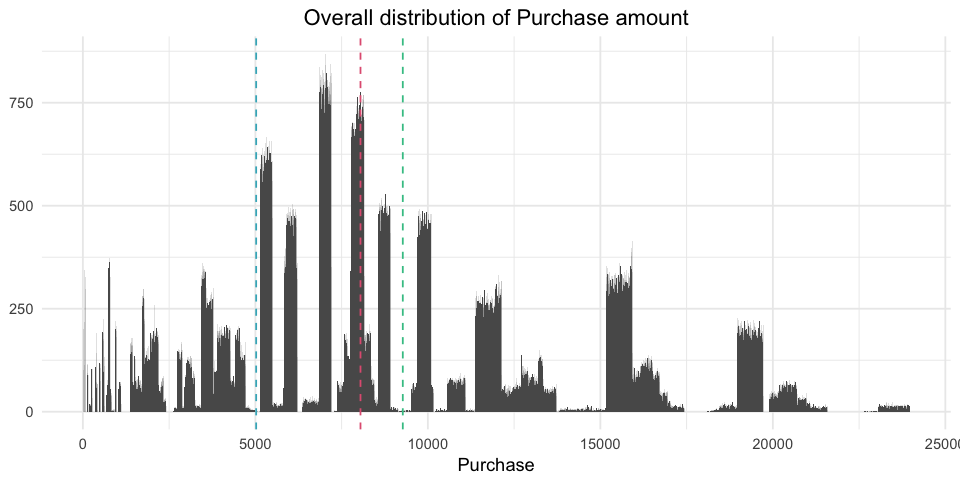

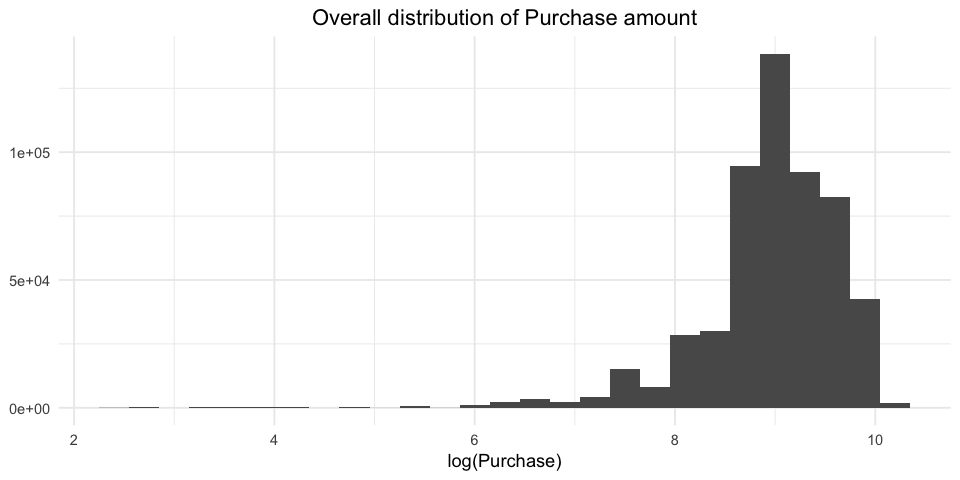

In [18]:
# plot size 
options(repr.plot.width = 8, repr.plot.height = 4)
par(mfrow = c(2, 1))

# overall distribution of purchase amounts
ggplot(train, aes(x = Purchase)) + 
  geom_histogram(binwidth = 5) +
  labs(title = "Overall distribution of Purchase amount", 
       y = NULL) +
  geom_vline(aes(xintercept = mean(new_train$Purchase)),
                 col = "#40C393", size = .5, linetype = "dashed") + 
  geom_vline(aes(xintercept = median(train$Purchase)),
                 col = "#E26181", size = .5, linetype = "dashed") +
  geom_vline(aes(xintercept = sd(train$Purchase)),
                 col = "#40B2C3", size = .5, linetype = "dashed") +
  theme_minimal() + custom_theme

# log overall distribution of purchase amounts
ggplot(train, aes(x = log(Purchase))) + 
  geom_histogram(binwidth = .3) +
  labs(title = "Overall distribution of Purchase amount", 
       y = NULL) +
  theme_minimal() + custom_theme


From the first plot above we see that the distribution is quite spread and right skewed, which has obviously impacted the average amount of purchase and pulled it up. There are many unusual features here, peaks and gaps, which looks more alike to the distribution of discrete values.

We could normalize the data by transforming purhase amount into its natural log. By doing this we account for the right skew we got.

In [9]:
require(moments)
cat('skewness and kurtosis of distribution are', 
    skewness(train$Purchase), 'and', kurtosis(train$Purchase), 'respectively')

Loading required package: moments


skewness and kurtosis of distribution are 0.6001384 and 2.661615 respectively

Under the hypothesis of normality, data should be symmetrical which results in skewness equal to zero. In real world though a normal distribution is a (very) rare case. So in our example it is already good enough to have a moderately skewed distribution (between 0.5 and 1).

As for kurtosis, which relates to the tails of the distribution and indicates the frequency of outliers in data, in our example it is less than 3. In its turn that means that the distribution has fewer and less extreme outliers than does the normal distribution (where the kurtosis is equal to 3).

##### Against Gender

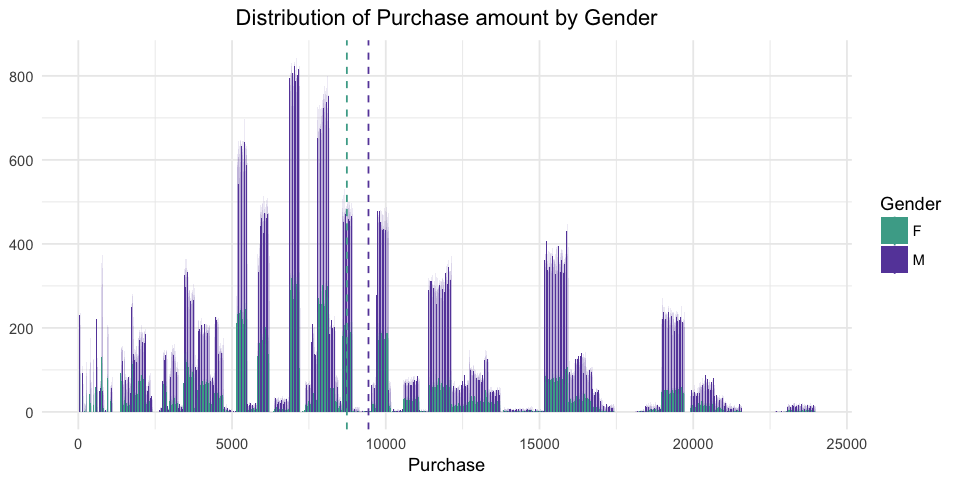

In [9]:
# calculate purchase average amounts for each gender
average <- ddply(train, "Gender", summarise, g.mean = mean(Purchase))

# Interleaved histograms
ggplot(train, aes(x = Purchase)) +
  geom_histogram(aes(fill = Gender), position = "dodge", binwidth = 7) +
  geom_vline(data = average, aes(xintercept = g.mean, color = Gender),
             linetype = "dashed") +
  labs(title = "Distribution of Purchase amount by Gender", y = NULL) +
  theme_minimal() + custom_theme +
  scale_fill_manual(values = gender_palette) +
  scale_color_manual(values = gender_palette)

##### Against main product categories

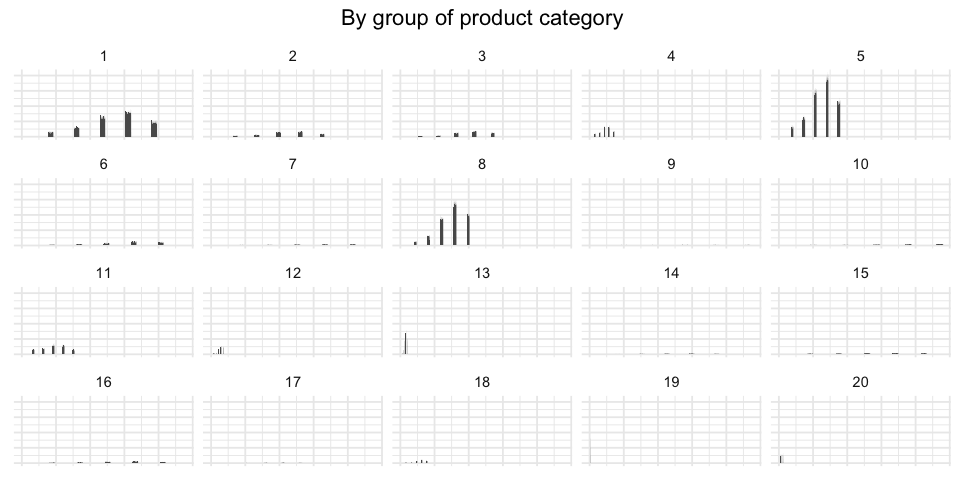

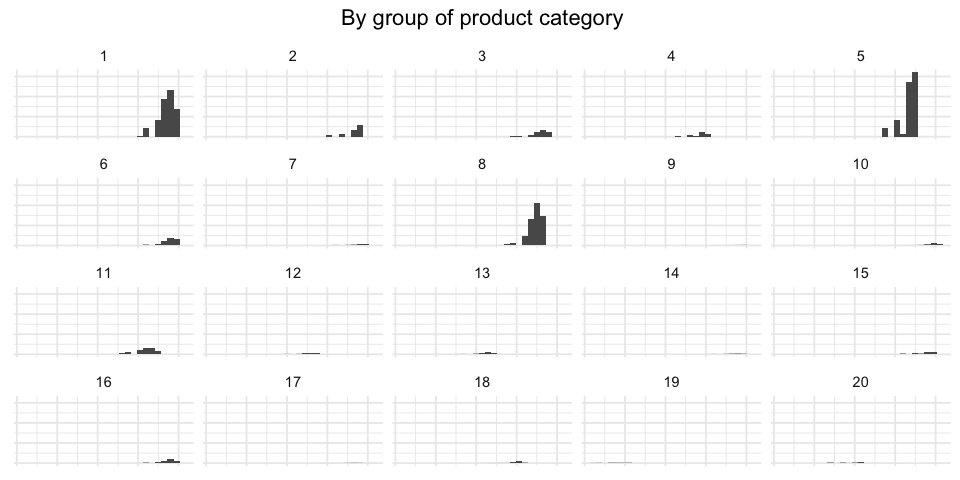

In [23]:
ggplot(new_train, aes(x = Purchase)) + 
        geom_histogram(binwidth = 5) +
        labs(title = "By group of product category", x = NULL, y = NULL) +
        facet_wrap(~ Main_Category) + 
        theme_minimal() + custom_theme + no_ticks_axis
# log
ggplot(new_train, aes(x = log(Purchase))) + 
        geom_histogram(binwidth = .3) +
        labs(title = "By group of product category", x = NULL, y = NULL) +
        facet_wrap(~ Main_Category) + 
        theme_minimal() + custom_theme + no_ticks_axis

##### Against Marital Status and City Categories

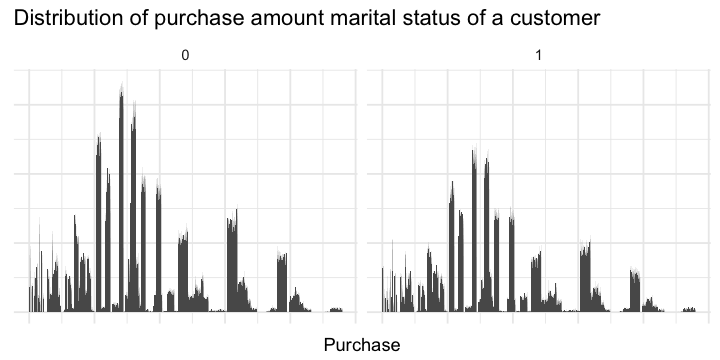

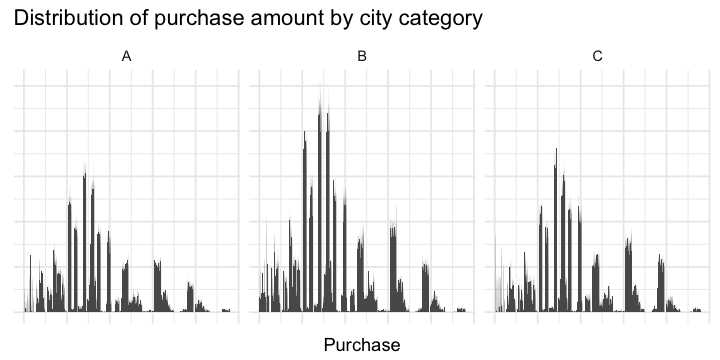

In [19]:
options(repr.plot.width = 6, repr.plot.height = 3)

# histograms
ggplot(new_train, aes(x = Purchase)) +
    geom_histogram(position = "dodge", binwidth = 7) + 
    labs(title = "Distribution of purchase amount marital status of a customer", y = NULL) +
    theme_minimal() + no_ticks_axis + 
    facet_wrap(~ factor(Marital_Status)) 

# more histograms
ggplot(new_train, aes(x = Purchase)) +
    geom_histogram(position = "dodge", binwidth = 7) +
    labs(title = "Distribution of purchase amount by city category", y = NULL) +  
    theme_minimal() + no_ticks_axis + 
    facet_wrap(~ City_Category)

##### Against Customer occupation

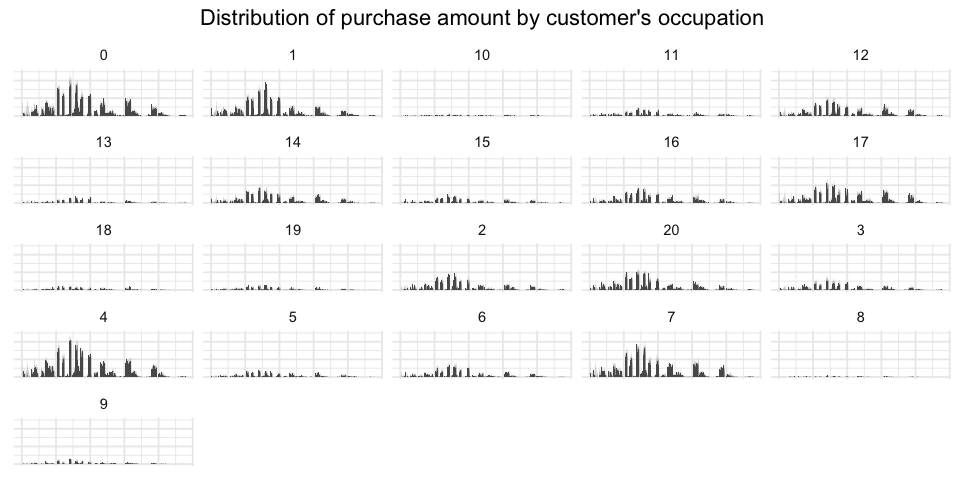

In [26]:
ggplot(new_train, aes(x = Purchase)) + 
    geom_histogram(binwidth = 5) +
    labs(title = "Distribution of purchase amount by customer's occupation", x = NULL, y = NULL) +
    theme_minimal() + custom_theme + no_ticks_axis +
    facet_wrap(~ Occupation)

### III. Predictive modeling

Analysis methods to consider here:

 - Ordinary least squares (OLS) Regression: we could try to analyze these data using OLS regression. However, the form of distribution looks a lot like a count data, which is highly non-normal and not well estimated by OLS regression. But we will try it out anyway and see what we could do to improve it.
 - Ordinary Count Models: Poisson or negative binomial models might be more appropriate choice. Poisson though require equality of mean and variance, which we don't have here.

First let's do some preparations:

In [20]:
#creating train/test sets
trainIndex <- createDataPartition(new_train$Purchase,
                                  p = .7, list = F)
train_set <- new_train[trainIndex, ]
test_set <- new_train[-trainIndex, ]

# cross validation par
ctrl <- trainControl(method = "cv", number = 10)

For continuous outcome, one of the main error metrics to evaluate will be RMSE (root mean squared error). Thise measure gives more weight to larger residuals (the difference between the predicted and the observed value) than to smaller ones. Essentially this means that we consider missing the prediction for the 2x higher amount of Purchase is more than twice worse than missing x1 amount. We want this number to be as lowest as possible.

In [21]:
# Function that returns Root Mean Squared Error
# x is a error: predicted - actual values
rmse <- function(x)
{sqrt(mean(x^2))}

In [22]:
# Baseline model 'predicts' the mean of the training data
base <- mean(train$Purchase) 
base_error <- train_set$Purchase - base
# Evaluate RMSE and print it out 
cat('RMSE of', rmse(base_error), 
    "will be considered as a baseline for further compairison.") 

RMSE of 5022.881 will be considered as a baseline for further compairison.

Let's start with a basic multiple linear regression model.

In [4]:
# linear regression: product categories as predictors 
lm1 <- lm(Purchase ~ Main_Category + factor(Product_Category_2) + factor(Product_Category_3),
          data = train_set)

# fitted vs residuals
xyplot(resid(lm1) ~ fitted(lm1),
       type = c("p", "g"),
       xlab = "Fitted", ylab = "Residuals")

ERROR: Error in is.data.frame(data): object 'train_set' not found


In [ ]:
# negative binomial regression: product categories as predictors 
glmnb <- glm.nb(Purchase ~ Main_Category + factor(Product_Category_2) + factor(Product_Category_3),
                data = train_set)

In [ ]:
# fitted vs residuals
xyplot(resid(glmnb) ~ fitted(glmnb),
       type = c("p", "g"),
       xlab = "Fitted", ylab = "Residuals")

to be continued